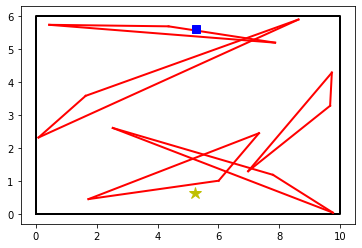

In [1]:
import numpy as np
import pylab as pl
import sys
sys.path.append('osr_examples/scripts/')
import environment_2d
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
env.plot()
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)

In [58]:
from math import dist

def nodes(r):
    #sample space for recording nodes
    samplex = []
    sampley = []
    sample = []
    sampletemp = []

    sample.append((x_start, y_start))
    sample.append((x_goal, y_goal))
    
    while True:
        #current location
        currentx = None
        currenty = None

        #generate random node across the map
        num = 0
        while (num<2000):
            tempx = 10*np.random.rand()
            tempy = 6*np.random.rand()
            if env.check_collision(tempx, tempy) == False and (tempx, tempy) not in sample: #make sure no repeat nodes
                num += 1
                samplex.append(tempx)
                sampley.append(tempy)
                sample.append((tempx, tempy))
        print("current sample" + str(len(sample)))

        #createlist for next visit and put start point as first visit node
        nextvisit = [(x_start, y_start)]

        #make a sample space copy 
        sampletemp = sample.copy()
        #print("temp" + str(len(sampletemp)))
        #create parentnode list for tracking
        parentsOf={}

        loops = 0 #for monitor loop

        while(len(nextvisit)!=0 and (currentx, currenty) != (x_goal, y_goal)):
            
            currentx, currenty = nextvisit[0]
            nextvisit.pop(0)
            #print(((x_start), (y_start)) in sample)
            sampletemp.remove((currentx, currenty)) #remove visited node from sample
            
            if(dist((x_goal, y_goal), (currentx, currenty)) < r): #if goal is reachable from current postiion, reach it and break
                parentsOf[(x_goal, y_goal)] = (currentx, currenty)
                (currentx, currenty) = (x_goal, y_goal)
                break
            
            for tempx, tempy in sampletemp: #mark every node within r and not visited as nextvisit
                thisnode = (tempx, tempy)
                if dist((tempx, tempy), (currentx, currenty)) < r:
                    parentsOf[(tempx, tempy)] = (currentx, currenty)
                    nextvisit.append(thisnode)
            
            loops += 1
            if(loops % 1000 == 0):
                print(loops)

        if(len(nextvisit) == 0 and (currentx, currenty) != (x_goal, y_goal)): # if goal not reachable 
            print("not found")
            #nodeNum+=2000
            print("current nodes: " + str(len(sample)))
        elif((currentx, currenty) == (x_goal, y_goal)): # if reached goal
            print("found")
            nodeNums.append(len(sample))
            print(str(r) + ': ' + str(len(sample)))
            break

In [59]:
#numNode = 2000
rdist = [0.5, 0.1, 0.05, 0.01]
nodeNums = []
nodeNum = 2000

for r in rdist:
    nodes(r)

current sample2002


ValueError: list.remove(x): x not in list

In [57]:
nodeNums

[2002, 12002, 38002]

In [48]:
((x_start), (y_start)) in sample

NameError: name 'sample' is not defined